In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pathlib import Path
from deepface import DeepFace
import numpy as np

In [8]:
dir = Path("../data/source/images")
imgs_filenames = [
    "1497325512-large.jpg", # magnetic fields
    "36133922467-px_500.jpg", # evanescence
    "13254251121-large.jpg", # básico antonio vega
    "30887653467-px_500.jpg", #asap rocly lla
    "14420632959-px_500.jpg", # frank ocean blonde
    "40654268451-px_500.jpg", # 10000hz legend
    "36261684302-px_500.jpg", # arctic monkeys lp1
    "2189361927-large.jpg", # ellie gounding halcyon
    "24259763065-px_500.jpg", # shaka ponk
    "22429537977-px_500.jpg", # lucie silvas bretahe in
    "4867481081-large.jpg", # no doubt the beacon street collection
    "10555288736-large.jpg", # ricky martin vuelve
    "5326371911-large.jpg", # marc ribot y los cubanos postizos
    "2044386287-large.jpg", # balanescu quartet
    "34887967702-px_500.jpg", # willie nelson
    "38914699566-px_500.jpg",  # janet jackson
    "1853685911-large.jpg", # heartbreak express dolly parton
    "31317351173-px_500.jpg", # bruce springsteen
    "4431257624-large.jpg", # tony bennet san francisco
    "11263223430-large.jpg", # tim buckley happy sad
    "10401553023-px_500.jpg", # lothar and the hand people
    "9587444766-px_500.jpg", # brenton wood oogum boogum
    "30784207657-px_500.jpg", # liquidator harry jallstars
    "22091651842-px_500.jpg", # ian & sylvia play one more
    "16208355522-large.jpg", # tomze
    "13939561673-px_500.jpg",
    "33827933544-px_500.jpg",
    "829521842-px_500.jpg", # portishead dummy
    "8006955239-large.jpg", # athends andover
    "11824755959-large.jpg", # wonderful madness
    "9141263295-large.jpg", # wanda
    "32258137908-px_500.jpg", # passing ships andrew hill
    ] 

In [9]:
backends = [
    'opencv',
    'ssd',
    'dlib',
    'mtcnn',
    'retinaface',
    'yunet',
    'centerface',
    'yolov8',
    'yolov11s',
    'yolov11n',
    'yolov11m',
    # 'fastmtcnn',
    # 'mediapipe',
]

# Initial exploration

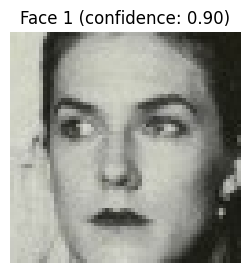

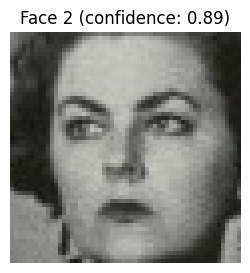

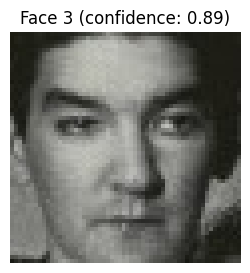

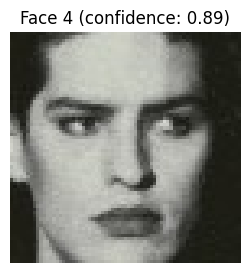

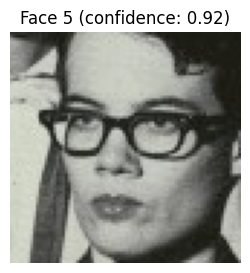

[{'face': array([[[    0.81961,     0.83137,     0.76471],
        [    0.81961,     0.83137,     0.76471],
        [    0.83529,     0.84706,     0.78039],
        ...,
        [    0.12157,     0.12157,    0.082353],
        [    0.10588,     0.10588,    0.066667],
        [    0.11373,     0.11373,     0.07451]],

       [[    0.80784,     0.81961,     0.75294],
        [    0.80784,     0.81961,     0.75294],
        [    0.82745,     0.83922,     0.77255],
        ...,
        [    0.11373,     0.11373,     0.07451],
        [    0.11373,     0.11373,     0.07451],
        [    0.11765,     0.11765,    0.078431]],

       [[    0.80784,     0.81961,     0.75294],
        [    0.80392,     0.81569,     0.74902],
        [    0.82745,     0.83922,     0.77255],
        ...,
        [    0.12157,     0.12157,    0.082353],
        [    0.12549,     0.12549,    0.086275],
        [    0.12157,     0.12157,    0.082353]],

       ...,

       [[    0.78824,     0.79216,     0.76078],
 

In [10]:
import matplotlib.pyplot as plt
from deepface import DeepFace
import json

# Extract faces
faces = DeepFace.extract_faces("../data/source/images/1497325512-large.jpg")

# Plot each detected face
for idx, f in enumerate(faces):
    plt.figure(figsize=(3, 3))
    plt.imshow(f["face"])
    plt.axis("off")
    plt.title(f"Face {idx+1} (confidence: {f['confidence']:.2f})")
    plt.show()

print(faces)

# Comparison backends

2025-09-09 19:02:51.048530: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


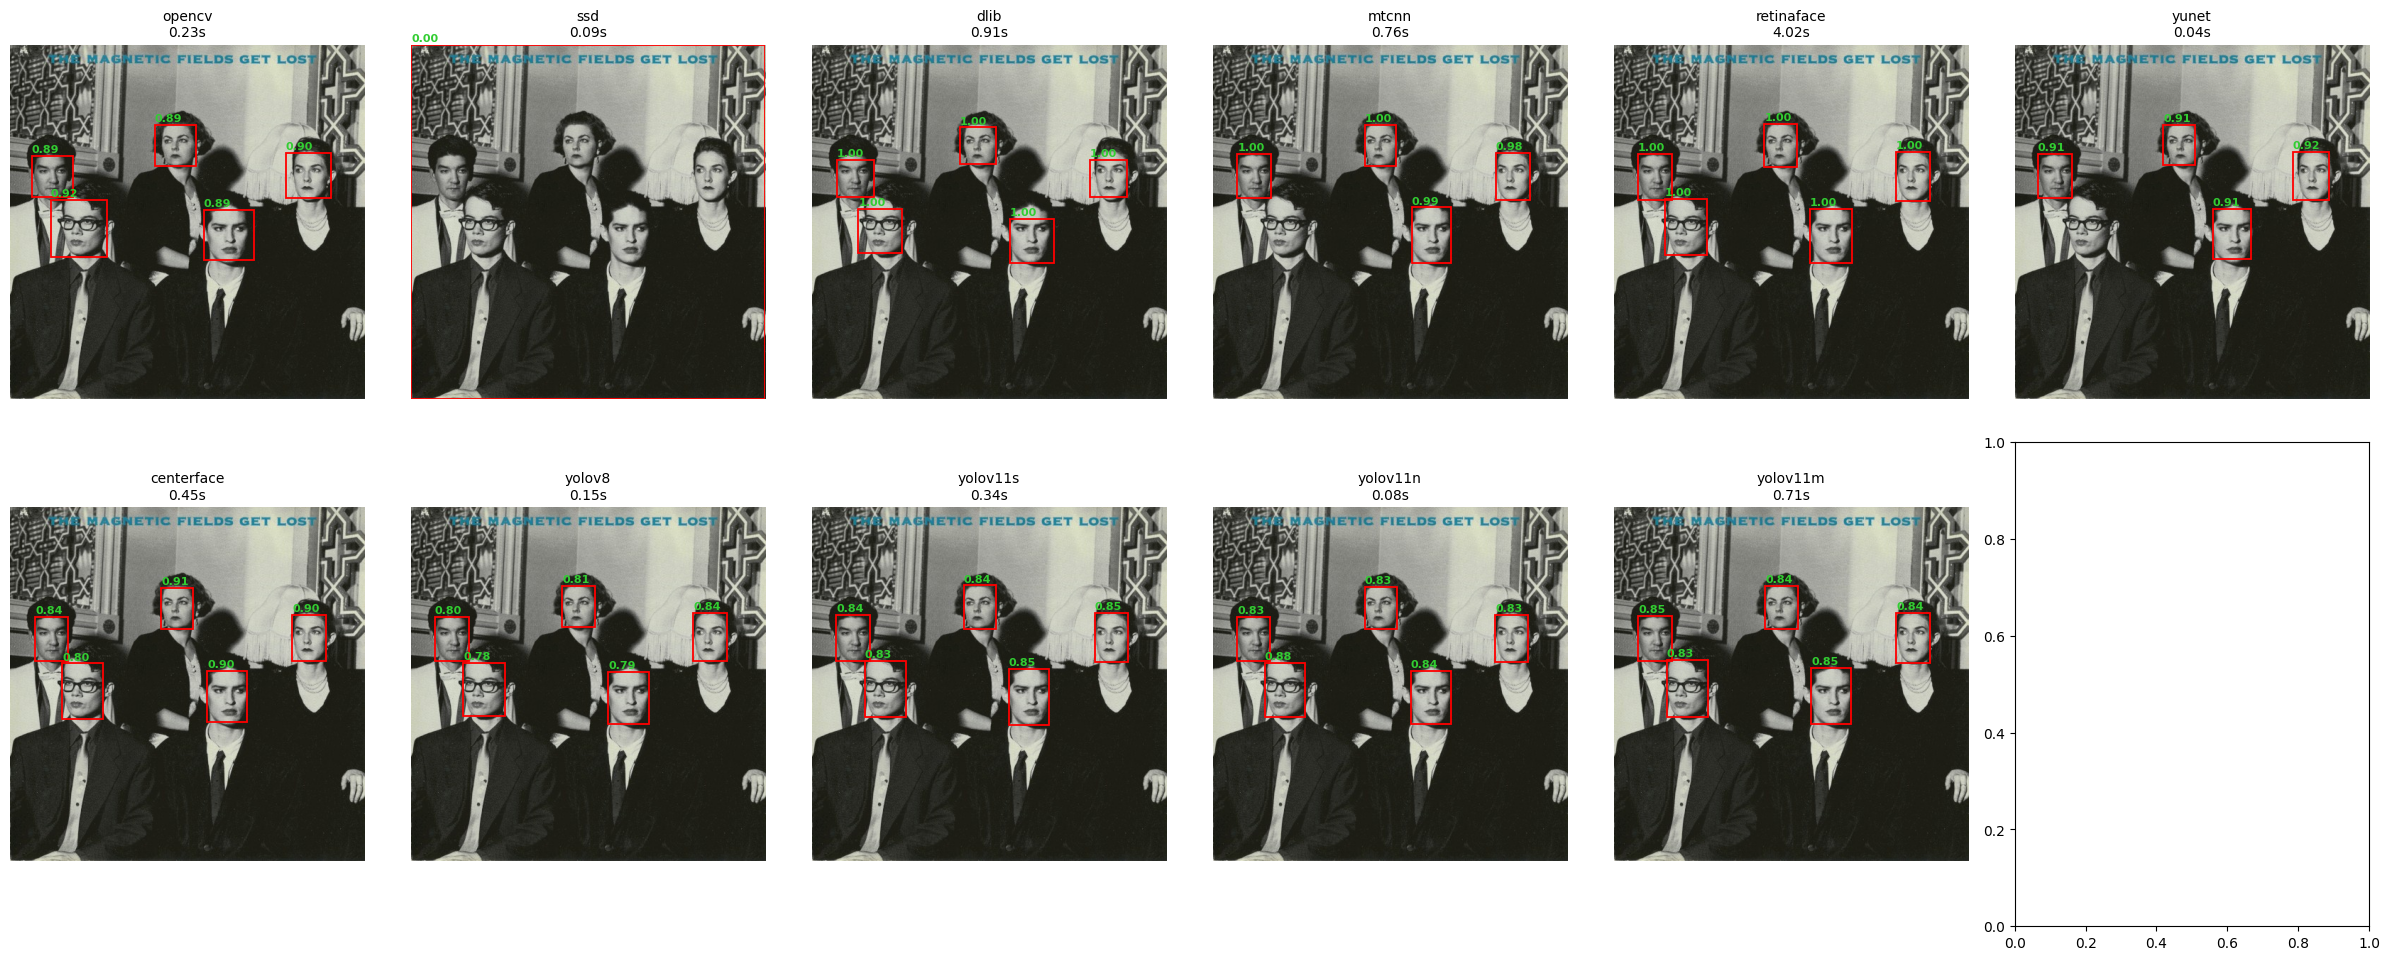

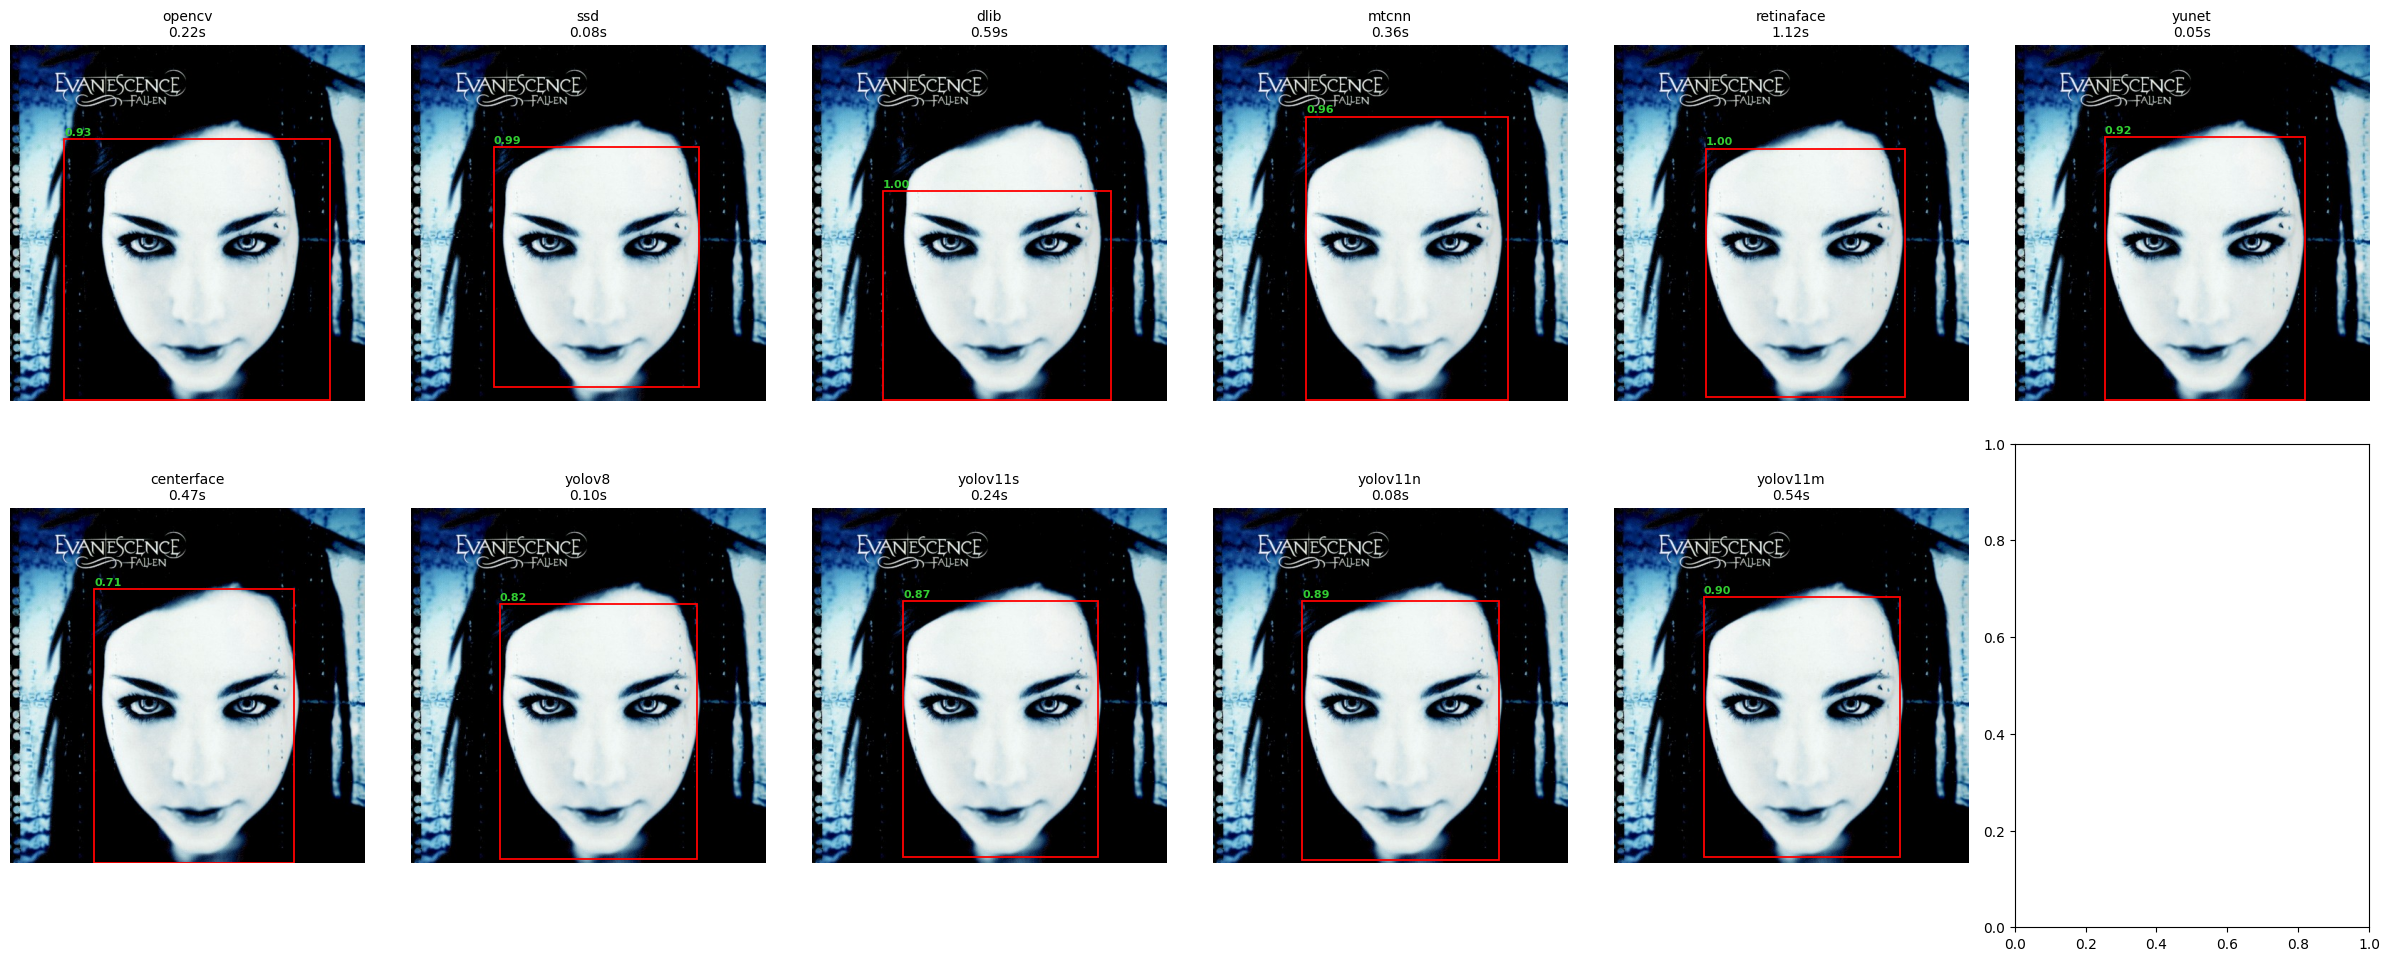

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from deepface import DeepFace
from pathlib import Path
from PIL import Image
import time

times_results = {}
for b in backends:
    times_results[b] = []


for filename in imgs_filenames[0:2]:
    path = dir / filename
    img = Image.open(path).convert("RGB")

    n = len(backends)
    n_cols = (n + 1) // 2  # split into 2 rows
    fig, axes = plt.subplots(2, n_cols, figsize=(4*n_cols, 10), squeeze=False)


    for j, b in enumerate(backends):
        row, col = divmod(j, n_cols)
        ax = axes[row, col]

        try:
            start = time.time()
            faces = DeepFace.extract_faces(str(path), detector_backend=b, enforce_detection=False)
            elapsed = time.time() - start
        except Exception as e:
            faces = []
            elapsed = None
            print(f"Error with {b} backend: {type(e).__name__}: {e}")

        times_results[b].append(elapsed)

        ax.imshow(img)
        ax.axis("off")

        # Draw faces if detected
        for f in faces:
            fa = f["facial_area"]
            x, y, w, h = fa["x"], fa["y"], fa["w"], fa["h"]
            rect = patches.Rectangle((x, y), w, h, linewidth=1.3, edgecolor="r", facecolor="none")
            ax.add_patch(rect)
            conf = f.get("confidence")
            if conf is not None:
                ax.text(x, y - 5, f"{conf:.2f}", color="limegreen", fontsize=8, weight="bold")

        # Title with backend + time
        if elapsed is not None:
            ax.set_title(f"{b}\n{elapsed:.2f}s", fontsize=10)
        else:
            ax.set_title(f"{b}\nError", fontsize=10)

    plt.tight_layout()
    plt.show()


# Test service function 

In [12]:
from albcovis.services.face_detection import detect_faces

In [13]:
path = "../data/source/images/1497325512-large.jpg"

faces = detect_faces(path)

In [14]:
faces

{'n_faces': 5,
 'mean_area': 3449,
 'largest_face': {'bbox': [73, 219, 57, 77],
  'segmentation': [[73, 219, 130, 219, 130, 296, 73, 296]],
  'area': 4389,
  'relative_size': 0.017556,
  'confidence': 0.88},
 'highest_confidence_face': {'bbox': [73, 219, 57, 77],
  'segmentation': [[73, 219, 130, 219, 130, 296, 73, 296]],
  'area': 4389,
  'relative_size': 0.017556,
  'confidence': 0.88},
 'average_relative_size': 0.06898,
 'faces': [{'bbox': [73, 219, 57, 77],
   'segmentation': [[73, 219, 130, 219, 130, 296, 73, 296]],
   'area': 4389,
   'relative_size': 0.017556,
   'confidence': 0.88},
  {'bbox': [279, 231, 56, 75],
   'segmentation': [[279, 231, 335, 231, 335, 306, 279, 306]],
   'area': 4200,
   'relative_size': 0.0168,
   'confidence': 0.84},
  {'bbox': [398, 151, 47, 67],
   'segmentation': [[398, 151, 445, 151, 445, 218, 398, 218]],
   'area': 3149,
   'relative_size': 0.012596,
   'confidence': 0.83},
  {'bbox': [34, 155, 46, 62],
   'segmentation': [[34, 155, 80, 155, 80, 2

In [15]:
# for filename in imgs_filenames:
#     path = dir / filename
#     faces = detect_faces(path)
#     for face in faces:
#         if face["facial_area"]["left_eye"] or face["facial_area"]["right_eye"]:
#             print(True)

# # Theres no response with yolov11n that retirn left or right eye data, delete it in final implementation